How is language effecting the trend of videos?

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from langdetect import detect

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from lingua import Language, LanguageDetectorBuilder
from googletrans import Translator

In [157]:
def read_csv_file(path):
    try:
        df = pd.read_csv(path, encoding='utf-8')
    except:
        df = pd.read_csv(path, encoding='latin1')
    return df
    
path_to_csv_Video_API_df =  'C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\YouTube_data\\processed_data\\Video_API.csv'
Video_API_df = read_csv_file(path_to_csv_Video_API_df)
path_to_csv_Video_df =      'C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\data\\Video_df.csv'
Video_df = read_csv_file(path_to_csv_Video_df)

df= pd.merge(Video_df, Video_API_df, on="video_id", how="left")


In [ ]:
df.keys()
#df.head()
df['default_audio_language']
len(set(df['default_audio_language']))
df['default_audio_language'].notnull().sum()

In [160]:
df=df.dropna(subset=['default_audio_language'])
df['default_audio_language']=df['default_audio_language'].apply(lambda x : x[:2])

In [162]:
df=df[['video_id', 'trending_date', 'title', 'country','default_audio_language']]
df.keys()

In [164]:
new_df=df.groupby(['country','default_audio_language']).count()

In [165]:
new_df=new_df['video_id'][:]
new_df=new_df.transpose()

In [179]:
all_countries=['CA', 'DE', 'FR', 'GB', 'MX', 'RU', 'US']

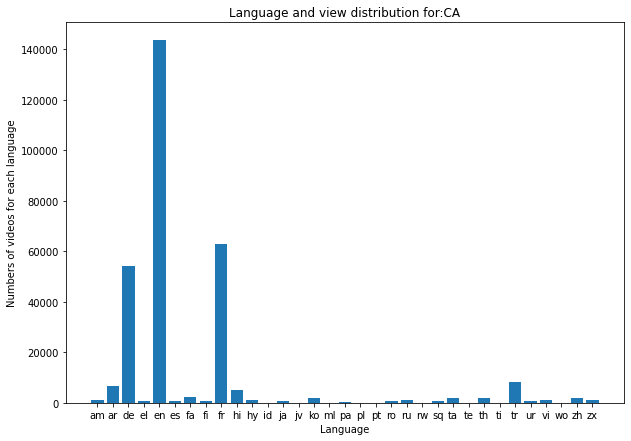

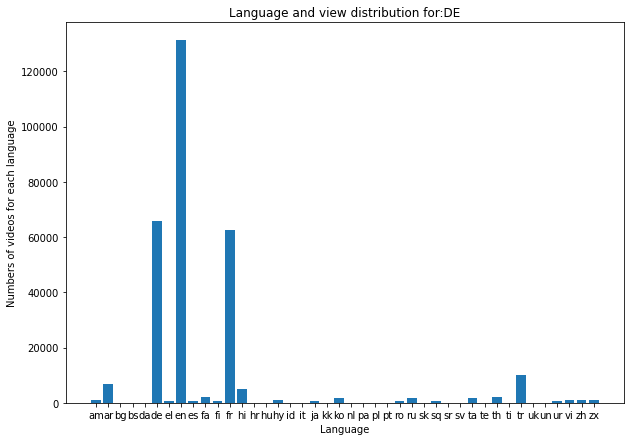

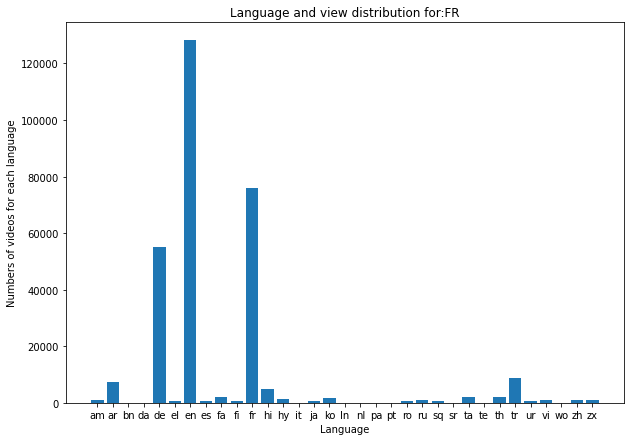

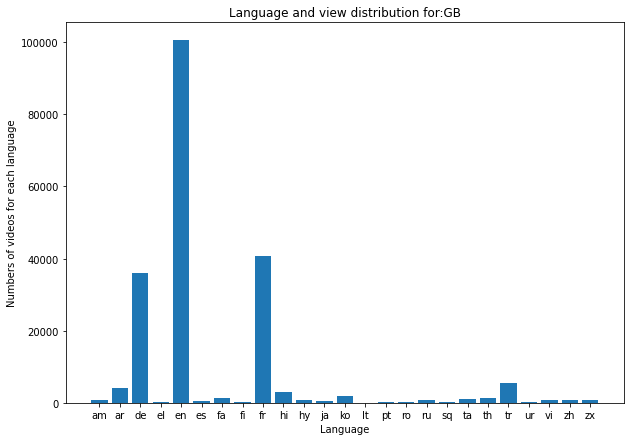

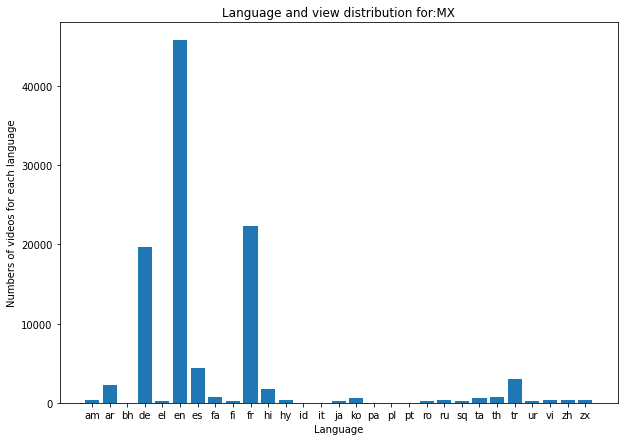

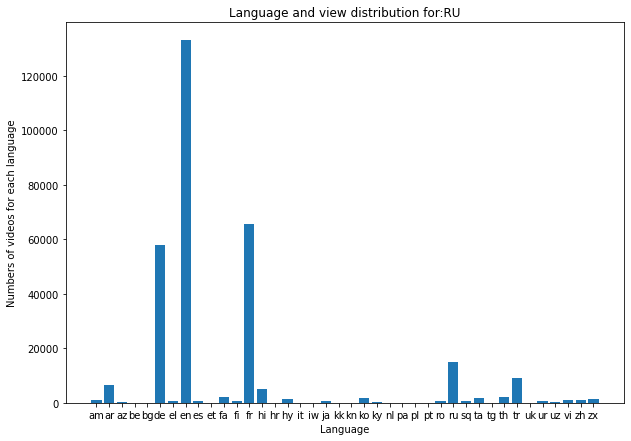

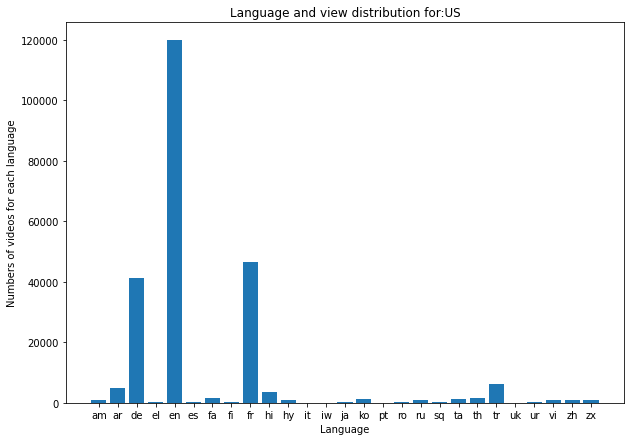

In [181]:
for country in all_countries:
    fig = plt.figure(figsize =(10, 7))
    _=plt.bar(new_df[country].keys(), list(new_df[country][:]))
    _=plt.xlabel("Language")
    _=plt.ylabel("Numbers of videos for each language") 
    _=plt.plot() 
    # Show Plot
    _=plt.title('Language and view distribution for:'+country)
plt.show()


In [ ]:
for country in all_countries:    
    label = new_df[country].keys()
    data = list(new_df[country][:])
    fig = plt.figure(figsize =(10, 7))
    #colors = [plt.cm.Blues(0.5), plt.cm.Purples(0.5), plt.cm.Greens(0.5)]

    _=plt.pie(data, labels = label, autopct="%1.1f%%", shadow=False, 
            startangle=180, wedgeprops={'edgecolor':'w', "alpha" : 0.7}, 
            textprops={"fontsize": 15, "color":'white', "fontweight":'bold'})
    
    # show plot
    _=plt.title('Language and view distribution for:'+country, 
                fontsize=14, fontweight='bold', x=0.5, y=1)
    _=plt.legend(label, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

Using https://github.com/pemistahl/lingua-py for language detection

In [58]:

languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
detector.detect_language_of("Geeksforgeeks es un portal informático para geeks")


Language.SPANISH

In [ ]:

translator = Translator()
translator.detect('adadaddad')

lang = detect("Ein zwei drei vier")
print(lang)

In [ ]:
df = df.assign(language_1=lambda x: (detect(str(df['title']))))
df = df.assign(language_2=lambda x: (detect(str(df['description']))))
# df.dropna()